In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy.stats as t


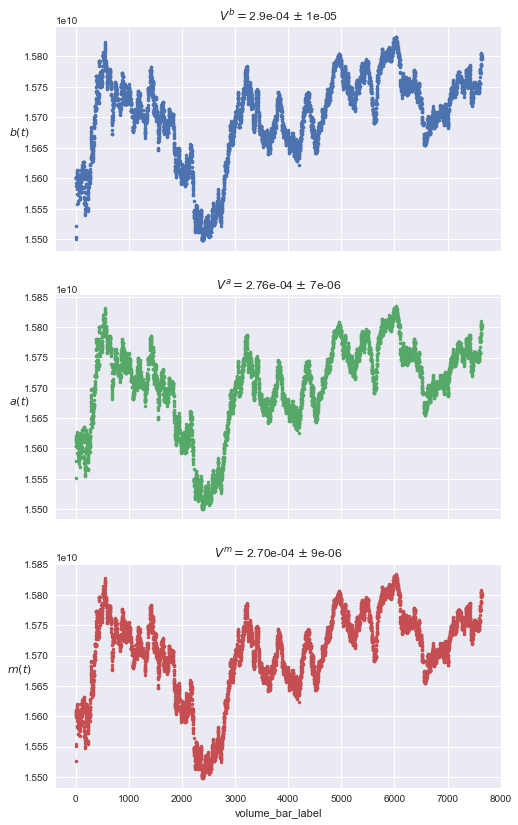

In [126]:
plt.style.use("seaborn-deep")
df = pd.read_csv("./time_evolution_10_levels.csv")

def std_std(sample):
    n = len(sample)
    mu = t.moment(sample, moment=4)
    return (((mu - sample.std() ** 4) / n) ** 0.5) / (2 * sample.std())

bid_price_series = df['bid_price_0']
ask_price_series = df['ask_price_0']
mid_price_series = df["mid_price"]
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 14))
ax1.scatter([t for t in range(len(bid_price_series))], bid_price_series, marker=".", linewidth=0,
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plt.xlabel("volume_bar_label")
ax1.set_ylabel("$b(t)$", rotation=0)
bid_volatility = np.log(np.array(bid_price_series[1:])/np.array(bid_price_series[:-1]))
bid_volatility_error = std_std(bid_volatility)
ax1.set_title(f"$V^b = ${bid_volatility.std():.1e} $\pm$ {bid_volatility_error:.0e}")
ax2.scatter([t for t in range(len(ask_price_series))], ask_price_series, marker=".", linewidth=0,
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
ax2.set_ylabel("$a(t)$", rotation=0)
ask_volatility = np.log(np.array(ask_price_series[1:])/np.array(ask_price_series[:-1]))
ask_volatility_error = std_std(ask_volatility)
ax2.set_title(f"$V^a = ${ask_volatility.std():.2e} $\pm$ {ask_volatility_error:.0e}")
ax3.scatter([t for t in range(len(mid_price_series))], mid_price_series, marker=".", linewidth=0,
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
ax3.set_ylabel("$m(t)$", rotation=0)
mid_volatility = np.log(np.array(mid_price_series[1:])/np.array(mid_price_series[:-1]))
mid_volatility_error = std_std(mid_volatility)
ax3.set_title(f"$V^m = ${mid_volatility.std():.2e} $\pm$ {mid_volatility_error:.0e}")
plt.show()

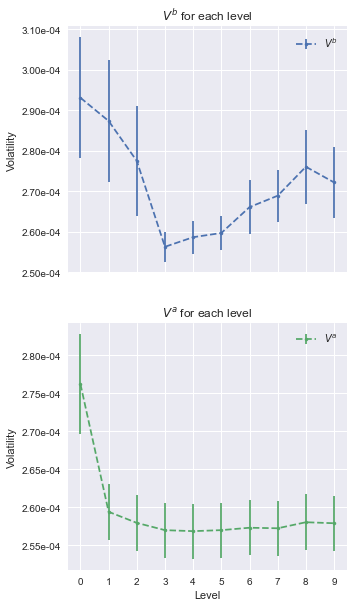

In [127]:
bid_volatility = []
ask_volatility = []
bid_volatility_error = []
ask_volatility_error = []
for level in range(10):
    bid_price_series = df.groupby("volume_bar_label")['bid_price_{}'.format(level)].min()
    ask_price_series = df.groupby("volume_bar_label")['ask_price_{}'.format(level)].max()
    bid_volatility.append(np.log(np.array(bid_price_series[1:])/np.array(bid_price_series[:-1])))
    bid_volatility_error.append(std_std(bid_volatility[level]))
    bid_volatility[level] = np.std(bid_volatility[level])
    ask_volatility.append(np.log(np.array(ask_price_series[1:])/np.array(ask_price_series[:-1])))
    ask_volatility_error.append(std_std(ask_volatility[level]))
    ask_volatility[level] = np.std(ask_volatility[level])
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 10))
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2e}'))
ax1.errorbar(range(10), bid_volatility, bid_volatility_error, label="$V^b$", marker=".", capsize=3.0, fmt="--",
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
ax1.set_title("$V^b$ for each level")
plt.xlabel("Level")
ax1.set_ylabel("Volatility")
ax1.set_xticks(range(10))
ax1.legend()
ax2.errorbar(range(10), ask_volatility, ask_volatility_error, label="$V^a$", marker=".", capsize=3.0, fmt="--",
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
ax2.legend()
ax2.set_title("$V^a$ for each level")
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2e}'))
ax2.set_ylabel("Volatility")
ax2.set_xticks(range(10))
plt.show()